In [1]:
include("./SuperLattice.jl")

Main.SuperLattice

In [2]:
using .SuperLattice
using LaTeXStrings
using Plots

# Studies of analytic and numeric ground energy $L_0$
We will first study what effects of increasing z-directional external field $h_z$ (i.e., $\Omega$) will cause the discrepancies between analytic and numeric ground energy. By keeping $C_6=-1$, $a=1.9$ and $l=4$, we vary $\Omega$ with $1$, $5$ and $10$.

In [3]:
Ns = 10:2:20;

In [4]:
f(x) = global_ground_energy(;v1=-1/1.9^6, v2=-1/2.1^6, v3=-1/4^6, Ω=1, N=x);
g(x) = generate_eigs(N=x, hx=0, hz=1, l=4, a=1.9, C6=-1, gstate=true);

In [5]:
f1(x) = global_ground_energy(;v1=-1/1.9^6, v2=-1/2.1^6, v3=-1/4^6, Ω=5, N=x);
g1(x) = generate_eigs(N=x, hx=0, hz=5, l=4, a=1, C6=-1, gstate=true);

In [6]:
f2(x) = global_ground_energy(;v1=-1/1.9^6, v2=-1/2.1^6, v3=-1/4^6, Ω=10, N=x);
g2(x) = generate_eigs(N=x, hx=0, hz=10, l=4, a=1, C6=-1, gstate=true);

In [7]:
fs = [f(N) for N in Ns];
@time gs = [g(N)[1][1] for N in Ns];

 25.422713 seconds (32.08 M allocations: 44.636 GiB, 9.26% gc time, 24.22% compilation time)


In [8]:
fs1 = [f1(N) for N in Ns];
@time gs1 = [g1(N)[1][1] for N in Ns];

 19.425454 seconds (267.94 k allocations: 42.943 GiB, 9.90% gc time, 0.21% compilation time)


In [9]:
fs2 = [f2(N) for N in Ns];
@time gs2 = [g2(N)[1][1] for N in Ns];

 19.365470 seconds (199.34 k allocations: 42.939 GiB, 10.72% gc time, 0.14% compilation time)


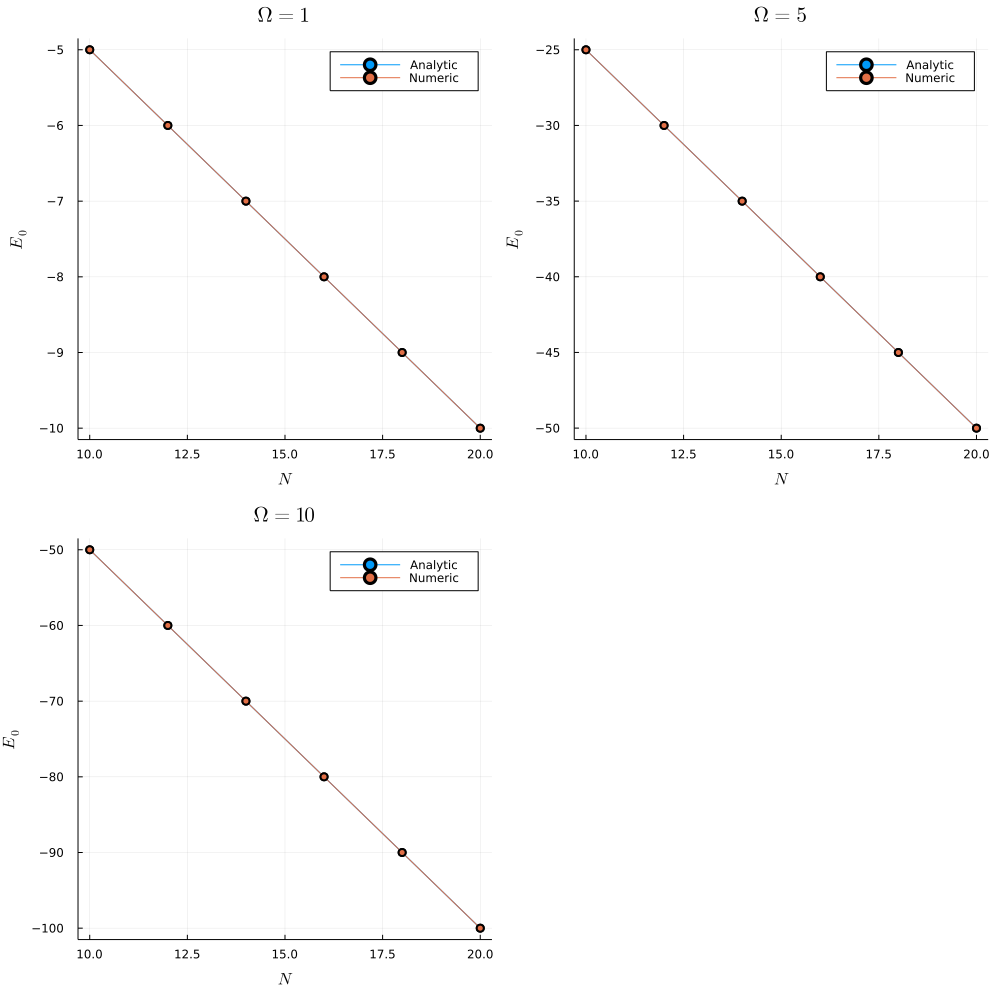

In [10]:
l = @layout [a b c]
p1 = plot(xlab=L"$N$", ylab=L"E_0", title=L"$\Omega=1$")
p2 = plot(xlab=L"$N$", ylab=L"E_0", title=L"$\Omega=5$")
p3 = plot(xlab=L"$N$", ylab=L"E_0", title=L"$\Omega=10$")

plot!(p1, Ns, fs, marker=:circle, label="Analytic")
plot!(p1, Ns, gs, marker=:circle, label="Numeric")
plot!(p2, Ns, fs1, marker=:circle, label="Analytic")
plot!(p2, Ns, gs1, marker=:circle, label="Numeric")
plot!(p3, Ns, fs2, marker=:circle, label="Analytic")
plot!(p3, Ns, gs2, marker=:circle, label="Numeric")
plot(p1, p2, p3, layout=3, size=(1000,1000))

We notice here that the by increasing $\Omega$ will not affect the discrepancies between numeric and analytic ground energy. We notice here that the analytic calculation matches perfectly with numerical simulations.

In [11]:
f(x) = global_ground_energy(;v1=-1000/x^6, v2=-1000/(10-x)^6, v3=-1000/10^6, Ω=0.04, N=16);
g(x) = generate_eigs(N=16, hx=0, hz=0.04, l=10, a=x, C6=-1000, gstate=true);

In [12]:
as = 1:0.1:5;

In [13]:
fs = [f(a) for a in as];
gs = [g(a)[1][1] for a in as];

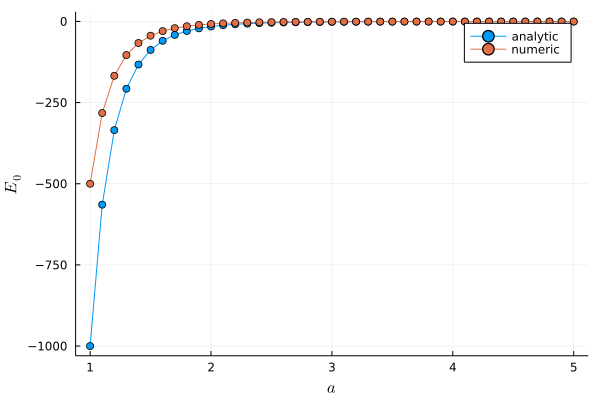

In [14]:
p2 = plot(xlab=L"$a$", ylab=L"$E_0$")
plot!(p2, as, fs, marker=:circle, label="analytic")
plot!(p2, as, gs, marker=:circle, label="numeric")